In [1]:
### Homework 3 for EconS 525 by Emma Taylor

### importing packages
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import wooldridge as woo
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
### Part 2
### Chapter 4

### Problem 2
### i. H0 : B3 = 0
###    HA : B3 > 0

### ii. Salary will increase by .87% if ros increases by 50 points. 
### This is a practically small effect.

### iii. critical t-stat for 10% confidence level: 1.282
### t-stat for B3 : .0174/.0041 = 4.24
### B3's t-stat is higher than the critical value, so
### we can reject the null hypothesis and conclude that
### ros has a positive effect on CEO salary.

### iv. I would include ros in the final model because the variable
### is statistically significant and has an effect on the dependent
### variable, even if the effect is small.

In [ ]:
### Problem 5
### 
### (i) 0.412 + 1.96(0.094) = 0.596
### 0.412 - 1.96(0.094) = 0.228 
### 95% confidence is (0.228, 0.596)
### (ii) t = (0.412 - 0.4)/0.094 = 0.1276
### This is < than 1.96, so you cannot reject the null hypothesis 
### (iii) t = (0.412 - 1)/0.094 = -6.256
### This is < -1.96, so you reject the null hypothesis 


In [ ]:
### Problem 10

### i. t-stats : 2.085, 1.59, 0.55, 1.085, 1.59
### None of the explanatory variables are statistically significant,
### except the constant. The entire model has some explanatory power.

### ii. t-stats : -0.922 , 1.61 , 0.86, 1.398, 1.147
### Not even the constant is statistically significant. No variables
### in the model have explanatory power. 

### iii. We should not use the logs of dkr and eps in the model because
### the logs of negative and 0 values are undefined.

### iv. The known characteristics of firms do very little to predict
### their stock prices.

In [11]:
### Computer Exercise 6
wage2 = woo.dataWoo('wage2')

reg = smf.ols(formula='np.log(wage) ~ educ + exper + tenure', data=wage2)
results = reg.fit()
R2 = results.rsquared
print (f'results.summary(): \n{results.summary()}\n')
print (f'R2: {R2}\n')

hypotheses1 = ['exper = tenure']
ftest = results.f_test(hypotheses1)

fstat = ftest.statistic[0][0]

fpval = ftest.pvalue

print(f'fstat1: {fstat}\n')
print(f'fpval1: {fpval}\n')

### (i) H0: B2 = B3, H1: B2 ≠ B3
### (ii) In conclusion, you cannot reject the null hypothesis that another year of general 
### workforce experience has the same effect on log(wage) as another year of tenure 
### because the p value is 0.68.


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     56.97
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           8.12e-34
Time:                        12:10:52   Log-Likelihood:                -438.84
No. Observations:                 935   AIC:                             885.7
Df Residuals:                     931   BIC:                             905.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4967      0.111

In [9]:
### Computer Exercise 10

elem94 = woo.dataWoo('ELEM94_95')

reg = smf.ols(formula = 'lavgsal ~ bs', data=elem94)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

b = results.params
se = results.bse

tstat = b / se
print(f'tstat: \n{tstat}\n')

tstat1 = (b + 1) / se
print(f'tstat1: \n{tstat1}\n')

### i. BS is statistically different from 0, but not from -1. 

reg1 = smf.ols(formula = 'lavgsal ~ bs + lenrol + lstaff', data=elem94)
results = reg1.fit()
print(f'results.summary(): \n{results.summary()}\n')


### ii. BS has a slightly smaller negative effect on lavgsal with the addition of 
### the next 2 variables. BS has the same coefficient here as in Table 4.1. 

### iii. Adding independent control variables helps model accuracy, which could be
### why the standard error of bs decreases with additional variables.

### iv. With additional staff, average salary goes down. This could be due to the fixed 
### budgets of public schools, who have to spread the same dollars over more people. 
### The coefficient implies that for every 1% increase in staff, average salaries
### will decrease by 0.7%. This is not a large effect.


reg2 = smf.ols(formula = 'lavgsal ~ bs + lenrol + lstaff + lunch', data=elem94)
results = reg2.fit()
print(f'results.summary(): \n{results.summary()}\n')


### v. Because the lunch coefficient is negative, the more students in a school 
### who qualify for free lunch, the lower teacher salaries actually are. 
### Teachers are not being compensated for teaching disadvantaged students. 

### vi. The enrollment coefficients are different from Table 4.1, but the 
### bs and staff coefficients are similar.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                lavgsal   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     28.23
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.21e-07
Time:                        16:55:32   Log-Likelihood:                 85.171
No. Observations:                1848   AIC:                            -166.3
Df Residuals:                    1846   BIC:                            -155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7479      0.052

In [12]:
### Computer Exercise 12

econmath = woo.dataWoo('econmath')

reg = smf.ols(formula='colgpa ~ hsgpa + actmth + acteng', data=econmath)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

hypotheses1 = ['actmth = acteng']
ftest = results.f_test(hypotheses1)

fstat = ftest.statistic[0][0]

fpval = ftest.pvalue

print(f'fstat1: {fstat}\n')
print(f'fpval1: {fpval}\n')

### (i) All explanatory variables are statistically significant.
### (ii) Holding actmth and acteng fixed, an increase in hsgpa by 0.343 increases
### colgpa by 0.226.
### To change colgpa by the same amount as hsgpa, actmth would need to increase by 
### 50.68 standard deviations.
### (iii) The p-value is 0.931, so we fail to reject the null hypothesis that 
### actmth and acteng have the same effect.
### (iv) I would tell the officer that this cannot be done because the r-squared 
### of the equation in part 1 is 0.256 meaning only 25.6% of the variance in 
### colgpa is explained by the independent variables.


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     92.76
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.31e-51
Time:                        12:12:19   Log-Likelihood:                -531.52
No. Observations:                 814   AIC:                             1071.
Df Residuals:                     810   BIC:                             1090.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0282      0.168

In [ ]:
#### Chapter 5

### Question 3
### Cigs would not have a normal distribution in the US adult population because 
### there would be a positive skew due to the cluster around zero as a large 
### percentage of adults don't smoke at all.

### Question 5 
### (i) If I use the normal distribution to estimate the probability that score
### exceeds 100, the answer would be 
### approximately 0.1.
### My answer contradicts the assumption of a normal distribution for score because
### normally the curve would come back down and only around 1% or less of people
### would get a perfect score.
### (ii) The normal distribution does not fit well in the left tail because 
### while the curve gradually falls down to zero, the scores between 20 and 
### 40 go up and down randomly.

In [ ]:
### Question 6 Proof
### y = B0 + B1 * x + B2 * x^2 + u
### E(u|x) = 0
### x ~ N(0, 1)
### E(x) = 0 ; E(x^2) = Var(x) = 1 ; E(x^3) = 0
### i. Let v = B2 * x^2 - B2 + u
### E(v) = B2 E(x^2) - B2 + E(u) = 0
### Let A0 = B0 + B2
### y = A0 + B1 * x + v = B0 + B1 * x + B2 * X^2 + u
### We can write y = A0 + B1 * X + y.
### ii. E[v|x] = E[B2 * x^2 + u|x] = B2 * E(x^2 | x) - B2 + E[u|x]
### = B2 * x^2 - B2 + 0 , given that E[u|x] = 0.
### E[v|x] depends on x except in that case that B2 = 0.
### iii. Cov(x,v) = E[(x - E(x)] - (V - E(x - 0))
### = B2 * 0 - B2 * 0 + E(x*u) = 0. Cov(x,v) = 0.

In [3]:
### Computer Exercise C3

bwght = woo.dataWoo('BWGHT')

reg_r = smf.ols(formula='bwght ~ cigs + parity + faminc', data=bwght)
fit_r = reg_r.fit()
r2_r = fit_r.rsquared
print(f'r2_r: {r2_r}\n')

bwght['utilde'] = fit_r.resid
reg_LM = smf.ols(formula='utilde ~ cigs + parity + faminc + motheduc + fatheduc' , data=bwght)
fit_LM = reg_LM.fit()
r2_LM = fit_LM.rsquared
print(f'r2_LM: {r2_LM}\n')

LM = r2_LM * fit_LM.nobs
print(f'LM: {LM}\n')

cv = stats.chi2.ppf(1 - 0.10, 2)
print(f'cv : {cv}\n')

### We can reject the null hypothesis at the 10% level and say that motheduc and 
### fatheduc != 0.

r2_r: 0.0348000578459019

r2_LM: 0.0040741636857858365

LM: 4.852328949770931

cv : 4.605170185988092



In [15]:
### Chapter 6

### Question 3 
rdchem = woo.dataWoo('rdchem')

reg = smf.ols(formula='rdintens ~ sales + salessq', data=rdchem)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

rdchem['salesbil'] = rdchem['sales']/1000
rdchem['salesbilsq'] = rdchem['salessq']/1000000

reg = smf.ols(formula='rdintens ~ salesbil + salesbilsq', data=rdchem)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

### (i) 0.0003sales = -0.000000007sales^2
### sales = 42857.143
### marginal effect of sales on rdintens becomes negative when sales reaches 
### 42857.143
### (ii) I would not keep the quadratic term in the model because it has a 
### p value of 0.072 and is, therefore, not statistically significant.
### (iii) rdintens = 2.613 (0.429) + 0.3006salesbil (0.139) - 0.0069salesbilsq (0.004),
### r-squared = 0.148
### (iv) For the purpose of reporting results, I prefer the second equation with
### fewer long decimals. 

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:               rdintens   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.527
Date:                Thu, 17 Feb 2022   Prob (F-statistic):             0.0973
Time:                        12:20:50   Log-Likelihood:                -62.421
No. Observations:                  32   AIC:                             130.8
Df Residuals:                      29   BIC:                             135.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6125      0.429

In [ ]:
### Question 4
###
### (i) log(wage)1 - log(wage)0 = B1(educ1-educ0) + B2(educ1-educ0)*pareduc
### ∆log(wage) = B1∆educ + B2∆educ*pareduc
### ∆log(wage) = ∆educ(B1 + B2pareduc)
### ∆log(wage)/∆educ = B1 + B2pareduc
### I expect B2 to have a positive sign because one can expect higher wages 
### with more education when their parents are also educated.
### (ii) 0.00078 on the interaction term educ*pareduc means that if both the 
### individual's and their parents' education increases by one year, their wages
### will go up by 0.078%.
### (iii) educ*pareduc coefficient is now negative, so education now depends
### negatively on parent education.
### t = 0.0016/0.0012 = 1.333, which is less than 1.96, so I do not reject
### the null hypothesis that the return to education does not depend on parents
### education.

In [ ]:
### Question 7

### I prefer the second model because it has the highest adjusted R2 and 
### the most statistically significant variables.

In [ ]:
### Question 10

### (i) A 10% increase in expenditures per student increases
### math test performance by 90.1% .
### (ii) Adding read4 to the regression made the coefficient on B(lexppp) 
### decrease drastically to 1.93.
### (iii) I prefer the equation with the smaller adjusted r-squared 
### because it has two more statistically significant variables than the other.

In [20]:
### Computer Exercise 2

wage1 = woo.dataWoo('WAGE1')

reg = smf.ols(formula='lwage ~ educ + exper + expersq', data=wage1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

### ii. Yes, p-value is 0.
### iii. 5th year: 100(0.0410 - 2*.0007*5) = 3.4%
###      20th year: 100(0.0410 - 2*.0007*20) = 1.3%

### iv. 0 = 100(0.0410 - 2*.0007*x) ; x = 29 years of experience
### 121 individuals have experience greater than or equal to 29 years.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     74.67
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           3.38e-40
Time:                        19:35:22   Log-Likelihood:                -319.53
No. Observations:                 526   AIC:                             647.1
Df Residuals:                     522   BIC:                             664.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1280      0.106

In [13]:
### Computer Exercise 3
wage2 = woo.dataWoo('wage2')
n = wage2.shape[0]

reg = smf.ols(formula='np.log(wage) ~ educ + exper + educ*exper', data=wage2)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula='np.log(wage) ~ educ + exper + educ*I(exper - 10)', data=wage2)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

CI95 = results.conf_int(0.05)
print(f'CI95: \n{CI95}\n')

### (i) log(Wage)1 - log(wage)0 = B1(educ1 - educ0) + B3(educ1 - educ0)*exper
### ∆log(wage) = B1∆educ + B3∆educ*exper
### ∆log(wage) = ∆educ(B1 + B3exper)
### ∆log(wage)/∆educ = B1 + B3exper
### (ii) the null hypothesis is H0: B3 = 0 and the alternative is H1: B3 ≠ 0 
### (iii) the p-value of educ*exper is 0.036, so we can reject 
### the null hypothesis that B3 = 0
### (iv) the 95% confidence interval of theta1, the return to education, 
### is (0.063097  0.089062)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     48.41
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           4.47e-29
Time:                        12:20:29   Log-Likelihood:                -449.87
No. Observations:                 935   AIC:                             907.7
Df Residuals:                     931   BIC:                             927.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9495      0.241

In [14]:
### Computer Exercise 5

house1 = woo.dataWoo('hprice1')

reg = smf.ols(formula='np.log(price) ~ np.log(lotsize) + np.log(sqrft) + bdrms', data=house1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula='price ~ lotsize + sqrft + bdrms', data=house1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

### (i) log(price) = -1.297 + 0.168log(lotsize) + 0.700log(sqrft) + 0.037bdrms + u 
### (ii) the predicted value of log(price) is 1.952 and the predicted value of 
### price is 382.640.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           9.74e-19
Time:                        12:20:32   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.

In [6]:
###  Computer Exercise 8

hprice1 = woo.dataWoo('HPRICE1')

reg = smf.ols(formula='price ~ lotsize + sqrft + bdrms', data=hprice1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

### i. price = -21.7703 + 0.0021*10000 + 0.1228*2300 + 13.8525*4 = 337.0791
### -> $336,707

cvalues1 = pd.DataFrame({'lotsize': [10000], 'sqrft': [2300], 'bdrms': [4]})
hrprice1_pred1 = results.predict(cvalues1)
print(f'hrprice1_pred1: \n{hrprice1_pred1}\n')

### ii.& iii. confidence intervals & prediction intervals

hrprice1_PICI_95 = results.get_prediction(cvalues1).summary_frame(alpha=0.05)
print(f'hrprice1_PICI_95: \n{hrprice1_PICI_95}\n')

### If we want a prediction interval that will predict future prices for
### homes with the same characteristics listed in part (i), the prediction
### interval from this regression will not give us a very precise answer.
### There is a range of almost $250,000.
### It could be the case that this model is missing variables that would 
### help it predict home prices more accurately.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.70e-20
Time:                        16:53:53   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475

hprice2: 
       price  crime   nox  rooms  dist  radial    proptax    stratio  lowstat  \
0    24000.0  0.006  5.38   6.57  4.09       1  29.600000  15.300000     4.98   
1    21599.0  0.027  4.69   6.42  4.97       2  24.200001  17.799999     9.14   
2    34700.0  0.027  4.69   7.18  4.97       2  24.200001  17.799999     4.03   
3    33400.0  0.032  4.58   7.00  6.06       3  22.200001  18.700001     2.94   
4    36199.0  0.069  4.58   7.15  6.06       3  22.200001  18.700001     5.33   
..       ...    ...   ...    ...   ...     ...        ...        ...      ...   
501  22400.0  0.063  5.73   6.59  2.48       1  27.299999  21.000000     9.67   
502  20600.0  0.045  5.73   6.12  2.29       1  27.299999  21.000000     9.08   
503  23899.0  0.061  5.73   6.98  2.17       1  27.299999  21.000000     5.64   
504  22000.0  0.110  5.73   6.79  2.39       1  27.299999  21.000000     6.48   
505  11900.0  0.047  5.73   6.03  2.51       1  27.299999  21.000000     7.88   

        lprice   

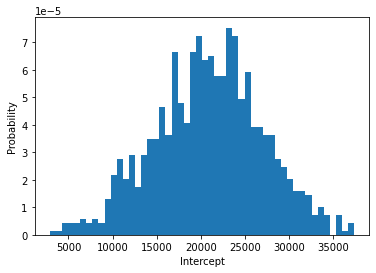

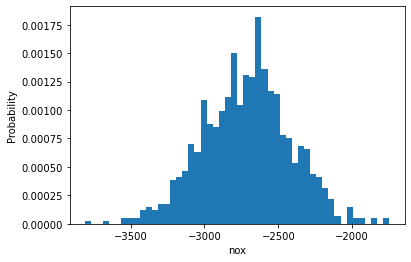

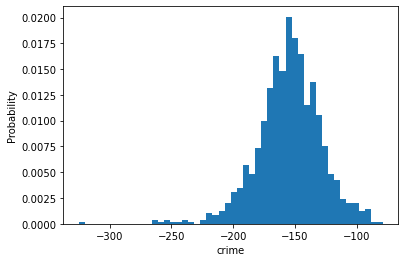

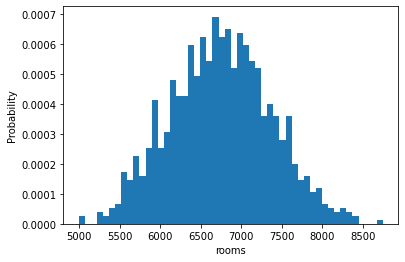

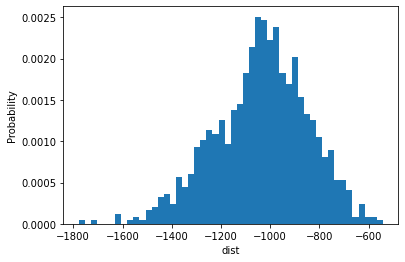

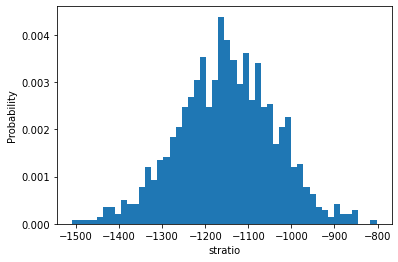

In [10]:
### Part 3 Bootstrapping

hprice2= woo.dataWoo('hprice2')

print(f'hprice2: \n{hprice2}\n')

Base_reg = smf.ols(formula='price ~ nox + crime + rooms + dist + stratio', data=hprice2)
Base_results = Base_reg.fit()
print(f'Base_results.summary(): \n{Base_results.summary()}\n')
    

num_samples = 1000

betas = []

for i in range(num_samples):
    bootstrap_sample = hprice2.sample(n=506, replace=True, axis=0)

    reg = smf.ols(formula='price ~ nox + crime + rooms + dist + stratio', data=bootstrap_sample)
    betas.append(reg.fit().params)
    
bootstrap_results= reg.fit()
print(f'bootstrap_results.summary(): \n{bootstrap_results.summary()}\n')

results_array = np.array(betas)

plt.hist(results_array[:,0], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Intercept')
plt.show()

plt.hist(results_array[:,1], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('nox')
plt.show()

plt.hist(results_array[:,2], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('crime')
plt.show()
plt.hist(results_array[:,3], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('rooms')
plt.show()

plt.hist(results_array[:,4], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('dist')
plt.show()

plt.hist(results_array[:,5], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('stratio')
plt.show()